In [1]:
!pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load top 10,000 most common words
vocab_size = 10000
max_length = 200

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))


Training samples: 25000
Testing samples: 25000


In [4]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(
    x_train, maxlen=max_length, padding='post'
)

x_test = tf.keras.preprocessing.sequence.pad_sequences(
    x_test, maxlen=max_length, padding='post'
)

print("After padding:", x_train.shape)


After padding: (25000, 200)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    tf.keras.layers.SimpleRNN(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\sadaw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.5180 - loss: 0.6915 - val_accuracy: 0.5181 - val_loss: 0.6884
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.5766 - loss: 0.6629 - val_accuracy: 0.5488 - val_loss: 0.6899
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.6156 - loss: 0.6143 - val_accuracy: 0.5733 - val_loss: 0.6656
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6465 - loss: 0.5565 - val_accuracy: 0.5875 - val_loss: 0.6623
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.6742 - loss: 0.5172 - val_accuracy: 0.5814 - val_loss: 0.7082


In [25]:
history.history


{'accuracy': [0.5180400013923645,
  0.5765600204467773,
  0.6156399846076965,
  0.6464800238609314,
  0.6741600036621094],
 'loss': [0.6914688348770142,
  0.6629307866096497,
  0.6143373250961304,
  0.5565218925476074,
  0.5171589851379395],
 'val_accuracy': [0.5181199908256531,
  0.5488399863243103,
  0.5733199715614319,
  0.5874800086021423,
  0.5814399719238281],
 'val_loss': [0.6884363889694214,
  0.6898966431617737,
  0.6655661463737488,
  0.6622815728187561,
  0.7082207202911377]}

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5814 - loss: 0.7082
Test Accuracy: 0.5814399719238281


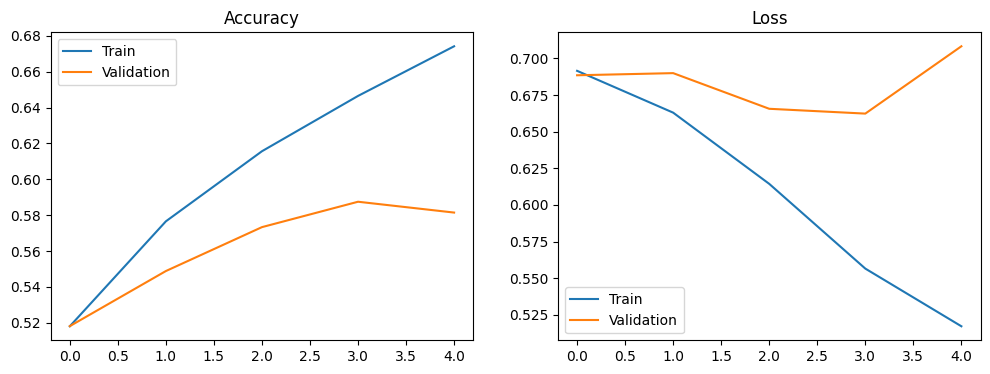

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()

plt.show()


In [10]:
index = 5
review = x_test[index]
label = y_test[index]

prediction = model.predict(review.reshape(1, max_length))
sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"

print("Predicted Sentiment:", sentiment)
print("Actual Sentiment:", "Positive" if label == 1 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Sentiment: Positive
Actual Sentiment: Positive
